### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Carwling)이라 함
- requests와 beautifulsoup4 패키지 사용

## 1. 웹 문서 전체 가져오기
### 1) urllib.request 패키지
####  1. url 문자열 변환 url 한글 인코딩 디코딩: 
- url 에 한글이 포함될 경우 오류가 나는 경우가 있다. 
-  이때 한글을 url 인코더로 바꿔서 입력해야 한다. 

<pre>
   - urllib 의 quote 와 unquote 사용 
   - quote() : 한글 -> url
   - unquote() : url -> 한글
</pre>
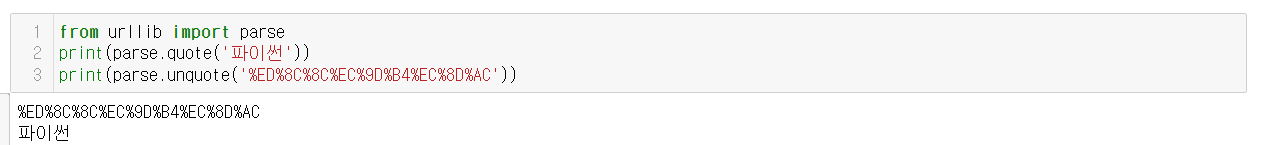
#### 2. 이미지 다운로드
>from urllib import request <br>
>request.urlretrieve('이미지url주소','파일명')

In [1]:
#url 한글 인코딩
from urllib import parse
print(parse.quote('파이썬'))
print(parse.unquote('%ED%8C%8C%EC%9D%B4%EC%8D%AC'))

%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬


In [2]:
# url open
from urllib.request import urlopen
from bs4 import BeautifulSoup as BS

#'파이썬' 네이버 지식인

html=urlopen('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC') 
soup=BS(html,'html.parser')
#print(soup)

In [3]:
# 이미지 다운로드
from urllib import request
request.urlretrieve('https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA3MTdfNSAg%2FMDAxNjU4MDU1NDk1MTMx.gYMOxufPdVxeftoxCjvARt0ySZWV_RTDJR27cvThAY0g.gYfUC3nvJImAhTzwHOvq18hYpwof9EQyo9-6Q6Ob9uEg.JPEG.monica32d%2F%25EA%25B0%2595%25EC%2595%2584%25EC%25A7%253F%25EB%25B6%2584%25EC%2596%2591240.jpg&type=a340','img01.jpg')

('img01.jpg', <http.client.HTTPMessage at 0x266eeff0a40>)

In [4]:
pwd

'C:\\Users\\go121\\practice_jupyter\\py\\데이터분석 및 시각화\\05 크롤링_01'

### 2) requests 패키지

In [5]:
import requests
from bs4 import BeautifulSoup as bs

#'파이썬' 네이버 지식인 검색어:'파이썬'

html=requests.get('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC') 
soup=BS(html.text,'html.parser')
#print(soup))

### 3) html 태그로 원하는 정보 추출

In [6]:
#find_all로 찾기
s_tags1=soup.find_all('strong','elss')
s_tags1

[<strong class="elss tit">AI로 사진 속 물체 지우기</strong>,
 <strong class="elss tit">AI 검색, 아직 안 써봤다면?</strong>,
 <strong class="elss tit">멤버십 회원이라면 10% 더 적립</strong>,
 <strong class="elss tit">가을 바람 살랑 불어올 때</strong>]

In [7]:
#select로 찾기
soup.select('strong.elss')

[<strong class="elss tit">AI로 사진 속 물체 지우기</strong>,
 <strong class="elss tit">AI 검색, 아직 안 써봤다면?</strong>,
 <strong class="elss tit">멤버십 회원이라면 10% 더 적립</strong>,
 <strong class="elss tit">가을 바람 살랑 불어올 때</strong>]

In [8]:
#텍스트만 추출
for s in s_tags1:
    print(s.text)

AI로 사진 속 물체 지우기
AI 검색, 아직 안 써봤다면?
멤버십 회원이라면 10% 더 적립
가을 바람 살랑 불어올 때


### [미션] 파이썬 연관검색어 정보 추출

In [9]:
#find_all
soup.find_all('div', 'tit')

[<div class="tit">파이썬 자격증</div>,
 <div class="tit">파이썬 독학</div>,
 <div class="tit">파이썬 기초</div>,
 <div class="tit">파이썬 설치</div>,
 <div class="tit">점프 투 파이썬</div>,
 <div class="tit">파이썬 책</div>,
 <div class="tit">파이썬 게임</div>,
 <div class="tit">아이패드 파이썬</div>,
 <div class="tit">파이썬 코드</div>,
 <div class="tit">파이썬 코딩</div>]

In [10]:
#select
tit_list = soup.select('div.tit')

In [11]:
for i in tit_list:
    print(i.text)

파이썬 자격증
파이썬 독학
파이썬 기초
파이썬 설치
점프 투 파이썬
파이썬 책
파이썬 게임
아이패드 파이썬
파이썬 코드
파이썬 코딩


### [미션] 글 제목만 추출

In [12]:
#find_all 
soup.select('div.api_subject_bx a.link_question')

[<a class="link_question" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=474404973&amp;enc=utf8&amp;kinsrch_src=pc_tab_kin&amp;qb=7YyM7J207I2s&amp;rank=1&amp;search_sort=0&amp;section=kin.qna_ency_cafe&amp;spq=0" onclick='return goOtherCR(this,"a=kin*k.title&amp;r=1&amp;i=10000009_00001c46d86d_1&amp;u="+urlencode(urlexpand(this.href)))' target="_blank"><mark>파이썬</mark> 입문 질문</a>,
 <a class="link_question" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=474404973&amp;enc=utf8&amp;kinsrch_src=pc_tab_kin&amp;qb=7YyM7J207I2s&amp;rank=1&amp;search_sort=0&amp;section=kin.qna_ency_cafe&amp;spq=0" onclick='return goOtherCR(this,"a=kin*k.question&amp;r=1&amp;i=10000009_00001c46d86d_1&amp;u="+urlencode(urlexpand(this.href)))' target="_blank">점프 투 <mark>파이썬</mark> 사서 <mark>파이썬</mark> 하는중인데 vs코드를 안써도되나요 유튜브를 보고 설치했는데도 너무 복잡하네요 그냥 idle만 써도되나요 일단 기초만 배울 생각입니다</a>,
 <a class="link_question" href="https://kin.naver.com/qna/detail.naver?d1id=

In [30]:
title_contant = [i.text for i in soup.select('div.api_subject_bx a.link_question')]
title_contant[::2]

['파이썬 입문 질문',
 '파이썬 c언어',
 'vscode 파이썬',
 '파이썬엑셀자동화질문',
 '파이썬독학할 때 어떻게 공부를 해야하나요',
 '파이썬 자동차 만들기',
 '파이썬 코딩 질문드립니다ㅠㅠ',
 '파이썬 질문',
 '파이썬관련 질문',
 '공기업 사무직도 파이썬을 배우면 업무를 함에 유용한가요']

In [13]:
#select


### [미션] '글제목'과 '하이퍼링크주소'를 추출하여 데이터프레임 형태로 저장하세요.


In [14]:
import pandas as pd

In [34]:
#find_all 
title_link = [i['href'] for i in soup.select('div.api_subject_bx a.link_question')]
title_link[::2]

['https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=474404973&enc=utf8&kinsrch_src=pc_tab_kin&qb=7YyM7J207I2s&rank=1&search_sort=0&section=kin.qna_ency_cafe&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=1040101&docId=475943347&enc=utf8&kinsrch_src=pc_tab_kin&qb=7YyM7J207I2s&rank=2&search_sort=0&section=kin.qna_ency_cafe&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=104&docId=474634231&enc=utf8&kinsrch_src=pc_tab_kin&qb=7YyM7J207I2s&rank=3&search_sort=0&section=kin.qna_ency_cafe&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=11&dirId=1118&docId=473597949&enc=utf8&kinsrch_src=pc_tab_kin&qb=7YyM7J207I2s&rank=4&search_sort=0&section=kin.qna_ency_cafe&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10406&docId=470741052&enc=utf8&kinsrch_src=pc_tab_kin&qb=7YyM7J207I2s&rank=5&search_sort=0&section=kin.qna_ency_cafe&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=10&dirId=100507&docId=474364540&enc=utf8&kinsrch_src=pc_tab

In [36]:
res = []
for i in range(len(title_contant[::2])):
    tmp = {}
    tmp['제목'] = title_contant[::2][i]
    tmp['링크'] = title_link[::2][i]
    res.append(tmp)
pd.DataFrame(res)

,제목,링크
0,파이썬 입문 질문,https://kin.naver.com/qna/detail.naver?d1id=1&...
1,파이썬 c언어,https://kin.naver.com/qna/detail.naver?d1id=1&...
2,vscode 파이썬,https://kin.naver.com/qna/detail.naver?d1id=1&...
3,파이썬엑셀자동화질문,https://kin.naver.com/qna/detail.naver?d1id=11...
4,파이썬독학할 때 어떻게 공부를 해야하나요,https://kin.naver.com/qna/detail.naver?d1id=1&...
5,파이썬 자동차 만들기,https://kin.naver.com/qna/detail.naver?d1id=10...
6,파이썬 코딩 질문드립니다ㅠㅠ,https://kin.naver.com/qna/detail.naver?d1id=1&...
7,파이썬 질문,https://kin.naver.com/qna/detail.naver?d1id=1&...
8,파이썬관련 질문,https://kin.naver.com/qna/detail.naver?d1id=1&...
9,공기업 사무직도 파이썬을 배우면 업무를 함에 유용한가요,https://kin.naver.com/qna/detail.naver?d1id=4&...


### [미션] '글제목, 작성자, 요약글, 작성일, href' 을 테이블형태로 수집

In [41]:
작성자 = [i.text for i in soup.select('span.name')]
작성자

['김현균',
 '마니',
 '엑플하나하나',
 '해온',
 'jas0****',
 '오렌지팜',
 'D3fau1t',
 '푸른하늘',
 '아인슈페너',
 '람입니다']

In [43]:
요약글 = [i.text for i in soup.select('div.api_subject_bx a.link_question')]
요약글[1::2]

['점프 투 파이썬 사서 파이썬 하는중인데 vs코드를 안써도되나요 유튜브를 보고 설치했는데도 너무 복잡하네요 그냥 idle만 써도되나요 일단 기초만 배울 생각입니다',
 'C언어는 처음에 stdio.h처럼 라이브러리라고 하나요? 이걸 불러 오잖아요 근데 파이썬은 그런 게 없잖아요 왜 그런가요? 그리고 stdio.h 이런 걸 뭐라고 하나요?',
 '크롬에서 파이썬 검색후 설치할때 항목 2개 있는거 아래거만 체크해서 설치했습니다. 이후 vscode를 깔고 확장프로그램 한국어랑 파이썬 설치한 후에 새로운 폴더, 파일 만들어서 커널환경 파이썬으로 바꿔서 시작하려고 했는데 파이썬이 설치가 안되어있다고 뜨고...',
 '파이썬 엑셀 자동화 시작하려고하는데요 그냥 쌩초보예요 openpyxl부터 설치하라는 글 봐서 파이썬 프로그램에 설치하려고하는데 왜 설치가 안될가요?...',
 '파이썬독학으로 공부하려고 합니다 파이썬이 다른 언어에 비해 쉽다고는 하는데 저처럼 비전공자에 코딩 공부를 처음하는데 파이썬독학으로 시작하려면 어떻게 공부를 하면 좋을까요? 파이썬독학 해보신분들 있으시면 자세하게 알려주시면 감사하겠습니다',
 '파이썬 찍먹만 해본 고1입니다 파이썬으로 자동차를 만들어볼려고 하는데 정말 아무것도 모르고 어떤 하드웨어를 써야 할지 모르겠슺니다. 정말 기초적으로 할수닜는거 알려주세뇨',
 '안녕하세요 대학교 과제로 파이썬 코딩 과제를 해야하는데 강의를 봐도 도저히 모르겠어서 도움 요청드립니다.ㅠㅠ 코드를 어떻게 짜야 할까요? 부탁드립니다.',
 '파이썬 완전 초보라 잘 몰라서 질문해봅니당 만약 제가 파이썬으로 어떤 프로그램을 만들고 그걸 저장해서 다른 사람한테 보낸다면 그 사람 컴퓨터에 파이썬이 없어도 제가 보낸 파일을 실행할 수 있나요?',
 '반도체관련 공대를 다니고 있는 학생입니다 내년에 3학년을 올라가기 전 파이썬과 엑셀을 공부하려고 하는데요 2학년때 이런 프로그램을 이용한 과목을 따라잡기가 너무 힘들더라구요 대학생에게 필요한 파이썬, 엑셀 관련 자격증이나 이 외

In [42]:
작성일 = [i.text for i in soup.select('span.etc.date')]
작성일

['2024.08.24.',
 '1주 전',
 '2024.08.29.',
 '2024.08.14.',
 '3주 전',
 '2024.08.23.',
 '2주 전',
 '2024.08.02.',
 '2024.08.22.',
 '2주 전']

In [44]:
res = []
for i in range(len(title_contant[::2])):
    tmp = {} # 글제목, 작성자, 요약글, 작성일, href
    tmp['글제목'] = title_contant[::2][i]
    tmp['작성자'] = 작성자[i]
    tmp['요약글'] = 요약글[1::2][i]
    tmp['작성일'] = 작성일[i]
    tmp['href'] = title_link[::2][i]
    res.append(tmp)
pd.DataFrame(res)

,글제목,작성자,요약글,작성일,href
0,파이썬 입문 질문,김현균,점프 투 파이썬 사서 파이썬 하는중인데 vs코드를 안써도되나요 유튜브를 보고 설치했...,2024.08.24.,https://kin.naver.com/qna/detail.naver?d1id=1&...
1,파이썬 c언어,마니,C언어는 처음에 stdio.h처럼 라이브러리라고 하나요? 이걸 불러 오잖아요 근데 ...,1주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
2,vscode 파이썬,엑플하나하나,크롬에서 파이썬 검색후 설치할때 항목 2개 있는거 아래거만 체크해서 설치했습니다. ...,2024.08.29.,https://kin.naver.com/qna/detail.naver?d1id=1&...
3,파이썬엑셀자동화질문,해온,파이썬 엑셀 자동화 시작하려고하는데요 그냥 쌩초보예요 openpyxl부터 설치하라는...,2024.08.14.,https://kin.naver.com/qna/detail.naver?d1id=11...
4,파이썬독학할 때 어떻게 공부를 해야하나요,jas0****,파이썬독학으로 공부하려고 합니다 파이썬이 다른 언어에 비해 쉽다고는 하는데 저처럼 ...,3주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
5,파이썬 자동차 만들기,오렌지팜,파이썬 찍먹만 해본 고1입니다 파이썬으로 자동차를 만들어볼려고 하는데 정말 아무것도...,2024.08.23.,https://kin.naver.com/qna/detail.naver?d1id=10...
6,파이썬 코딩 질문드립니다ㅠㅠ,D3fau1t,안녕하세요 대학교 과제로 파이썬 코딩 과제를 해야하는데 강의를 봐도 도저히 모르겠어...,2주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
7,파이썬 질문,푸른하늘,파이썬 완전 초보라 잘 몰라서 질문해봅니당 만약 제가 파이썬으로 어떤 프로그램을 만...,2024.08.02.,https://kin.naver.com/qna/detail.naver?d1id=1&...
8,파이썬관련 질문,아인슈페너,반도체관련 공대를 다니고 있는 학생입니다 내년에 3학년을 올라가기 전 파이썬과 엑셀...,2024.08.22.,https://kin.naver.com/qna/detail.naver?d1id=1&...
9,공기업 사무직도 파이썬을 배우면 업무를 함에 유용한가요,람입니다,‘파이썬 업무자동화’를 검색하다가 람입니다님의 답변을 보고 제 고민을 해결하는데 도...,2주 전,https://kin.naver.com/qna/detail.naver?d1id=4&...
